<H1> Lights 
 <h2>   - I prepared dataset for us because of course that was second step. I fight long time with excel and csv but now is ok. should be. Important to import xlrd  because without this some values are not correctly in excel file. At the begining is code. When you scrool down there are my evaluations and probs to make it good and check if everything is ok. As you see or not we have 172 countries so 3668 rows and from this  8 percent have no values. This 8 percent is our aim to predict. I have code to meybe add some rows which we losted in marging but not more than 150. Because there is another way of marging using smaller multiindex. In dataset with column sum of light there is 4100 rows. So inner join caused losing 500 rows - country which are not matched or dind t existed in both dataset(excel-swiatelkagl and csv - swiatla).

In [91]:
pwd

'C:\\Users\\MATOJ'

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import xlrd

In [4]:
swiatla=pd.read_csv("C:/Users/MATOJ/Desktop/nightlight/swiatlanoco.csv",sep=';' , encoding='ISO-8859-1')

In [5]:
swiatelkagl=pd.read_excel("C:/Users/MATOJ/Desktop/nightlight/switla.xlsx")

In [6]:
kraje=pd.read_excel("C:/Users/MATOJ/Desktop/nightlight/kraje.xlsx",sheet_name="Arkusz1",index_col="Code")

In [7]:
countries=pd.read_excel("C:/Users/MATOJ/Desktop/countries.xlsx" , encoding='ISO-8859-1',index_col="Code")

In [8]:

slow={"countrycode":"Code","countryname":"Region","year":"Year"}
swiatla.rename(columns=slow,inplace=True)

In [11]:
groupscountries=swiatla.groupby(by=["Code","Region","Year"]).agg({"sum_light":"sum","mean_light":"mean"})

In [12]:
groupscountries["logarytmzsuml"]=np.log(groupscountries["sum_light"])

In [17]:
m=groupscountries

<H1> grouping of second  dataset

In [13]:
groups2=swiatelkagl.groupby(by=["Code","Region","Year"])
r=groups2.sum()


<h2> now we have almost two main dataset
    :)

In [15]:
swiatla["mean_light"]=swiatla["mean_light"].astype(int)

<h2> join function trying with suffices

In [18]:
km=r.merge(m,how='inner',left_index=True,right_index=True)

In [19]:
fulldataset=km.merge(kraje,how='inner',left_index=True,right_index=True)

In [20]:
pd.options.display.max_columns=40

In [21]:
fullset=fulldataset.reset_index().set_index(["Code"])

In [22]:
fulldataset2=fullset.merge(countries,how='inner',left_index=True,right_index=True)

In [23]:
names = {"Area Lit (Log, km2)":"Area_lit",
         "Electricity Consumption (Log, Billion kWh)":"Elect_Cons",
         "CO2 Emissions (Log, metric tonnes)":"CO2", 
        "Gross Domestic Product (Log, Billion (Nominal) Current US$)":"Log_GDP",
        "Population (Log)": "Log_pop",
        "N2O Emissions (Log, kt of CO2 equivalent)":"N20",
         "CH4 Emissions (Log, kt of CO2 equivalent)":"CH4",
         "HFC, PFC and SF6 Emissions (Log, kt of CO2 equivalent)":"Emissions",
         "Poverty Headcount Ratio (at national poverty lines)":"Poverty", 
        }

In [25]:
fulldataset2.rename(columns=names, inplace=True)

<h2> Be careful here. Chaniging nan on zeros may have consequences. if not neccessary don t touch

In [38]:
#fulldataset2.replace(0,np.NaN,inplace=True)

In [ ]:
#fulldataset2["Coastline (coast/area ratio)"].replace(np.NaN,0,inplace=True)

<H1> set  about threecolumns -helpers

In [26]:
p=fulldataset2.isnull().sum()/len(fulldataset2)

colcat=["Region_x","Continent","Country","Region_y"]

fulldataset2[colcat]=fulldataset2[colcat].astype('category')

In [29]:
p=fulldataset2.isnull().sum()/len(fulldataset2)

In [30]:
b=(fulldataset2.isnull().sum())/22

In [31]:
p.sort_values(ascending=False)

Climate                               0.071274
Literacy (%)                          0.035501
Agriculture                           0.023577
Industry                              0.023577
Phones (per 1000)                     0.017886
Service                               0.017615
Net migration                         0.005962
Infant mortality (per 1000 births)    0.005962
GDP ($ per capita)                    0.005962
Birthrate                             0.005962
Deathrate                             0.005962
Elect_Cons                            0.000000
Area_lit                              0.000000
sum_light                             0.000000
Year                                  0.000000
CO2                                   0.000000
Log_GDP                               0.000000
Log_pop                               0.000000
N20                                   0.000000
CH4                                   0.000000
Emissions                             0.000000
Poverty      

In [99]:
logpopul=fulldataset2["Log_pop"]
varpop=fulldataset2["Population"]
varsum=fulldataset2["Area (sq. mi.)"]
varelect=fulldataset2["Elect_Cons"]

<function matplotlib.pyplot.show(*args, **kw)>

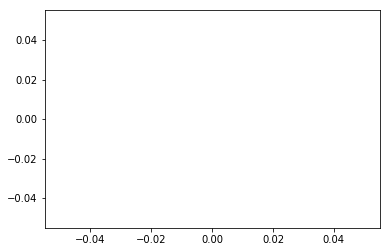

In [50]:
# plt.plot(x=fulldataset2["Area (sq. mi.)"],y=fulldataset2["Population"])
# plt.show

<function matplotlib.pyplot.show(*args, **kw)>

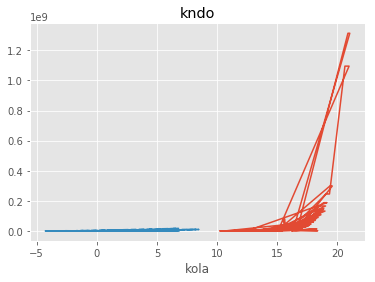

In [111]:
# plt.plot(logpopul,varpop,label="python")
# plt.plot(varelect,varsum,label="venom",linestyle="--")
# plt.xlabel("kola")
# plt.style.use("ggplot")
# plt.title("kndo")

# plt.show

In [50]:


colcat=["Region_x","Continent","Country","Region_y"]
fulldataset2[colcat]=fulldataset2[colcat].astype('category')
fulldataset3=fulldataset2.drop(columns=colcat)

p=fulldataset3.isnull().sum()/len(fulldataset3)
#pearson od spearman??
#corre=fulldataset3.corr(method='pearson')
#k=corre["Log_GDP"].sort_values(ascending=False)

corre=fulldataset3.corr(method='spearman')
k=corre["Log_GDP"].sort_values(ascending=False)
sklad=pd.DataFrame([k,p,b])
sklad=pd.DataFrame([k,p,b])

skladnames={"Unnamed 0":"procent_nuli","Unnamed 1":"liczba krajów z nulami"}

sklad.rename(columns=skladnames,inplace=True)

sklad.rename(index=skladnames,inplace=True)

sklad.transpose()
#sklad.sort_values(by="",axis=0)

,Log_GDP,procent_nuli,liczba krajów z nulami
Log_GDP,1.000000,0.000000,0.000000
Area_lit,0.909952,0.000000,0.000000
sum_light,0.908833,0.000000,0.000000
logarytmzsuml,0.908833,0.000000,0.000000
CO2,0.905778,0.000000,0.000000
Elect_Cons,0.901924,0.000000,0.000000
Log_pop,0.714976,0.000000,0.000000
Population,0.666843,0.000000,0.000000
mean_light,0.504470,0.000000,0.000000
GDP ($ per capita),0.488651,0.005962,1.000000


In [ ]:
fulldataset2["gazy"].

In [472]:
kCO2

CO2                                   1.000000
Log_GDP                               0.767739
gazy                                  0.732312
Log_pop                               0.642116
logarytmzsuml                         0.633588
Elect_Cons                            0.611116
merge_el_AL                           0.591496
Area_lit                              0.565615
Emissions                             0.513462
sum_light                             0.309754
Area (sq. mi.)                        0.301518
Population                            0.261557
Industry                              0.252917
Arable (%)                            0.202622
CH4                                   0.195418
N20                                   0.195148
Net migration                         0.186597
Climate                               0.159530
GDP ($ per capita)                    0.153324
Literacy (%)                          0.110971
Phones (per 1000)                     0.072557
Year         

In [ ]:
correCO2=fulldataset3.corr(method='pearson')
kCO2=correCO2["CO2"].sort_values(ascending=False)
kCo2

In [500]:
import statsmodels.api as sm

X = fulldataset2["logarytmzsuml"]
y = fulldataset2["CO2"]
X = sm.add_constant(X)
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model


# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     2473.
Date:                Thu, 05 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:37:26   Log-Likelihood:                -9867.3
No. Observations:                3690   AIC:                         1.974e+04
Df Residuals:                    3688   BIC:                         1.975e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1059      0.290      3.815      0.000       0.537       1.674
logarytmzsuml     1.2211      0.025     49.733      0.000       1.173       1.269
==============================================================================
Omnibus:                     2634.541   Durbin-Watson:                   0.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28076.721
Skew:                          -3.494   Prob(JB):                         0.00
Kurtosis:                      14.566   Cond. No.                         59.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [512]:
zeros=fulldataset2["CO2"]==0

In [513]:
fulldataset2[zeros]

,Region_x,Year,Area_lit,Elect_Cons,CO2,Log_GDP,Log_pop,N20,CH4,Emissions,Poverty,sum_light,mean_light,logarytmzsuml,Continent,Country,Region_y,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,merge_el_AL,gazy,Gazyyyy,GazyG
Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [480]:
X = sm.add_constant(X)

C:\Users\MATOJ\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [490]:
X.sort_values(by="logarytmzsuml",ascending=True)

,const,logarytmzsuml
Code,,
SLB,1.0,5.808142
SLB,1.0,5.852202
COM,1.0,5.877736
COM,1.0,5.905362
LBR,1.0,6.052089
SLB,1.0,6.135565
COM,1.0,6.186209
STP,1.0,6.249975
GNB,1.0,6.255750


<Figure size 1440x1080 with 0 Axes>

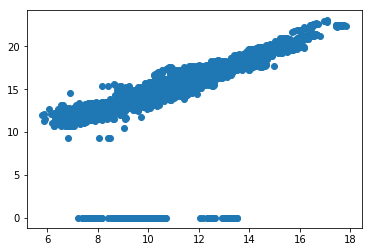

<Figure size 1440x1080 with 0 Axes>

In [37]:
plt.scatter(x=fulldataset2["logarytmzsuml"],y=fulldataset2["CO2"],)
plt.figure(figsize=[20,15])

In [ ]:
plt.plot()

In [ ]:
skladnames={"Unnamed 0":"procent_nuli","Unnamed 1":"liczba krajów z nulami"}

In [352]:
sklad.rename(columns=skladnames,inplace=True)

In [354]:
sklad.rename(index=skladnames,inplace=True)

,const,logarytmzsuml
Code,,
AFG,1.0,9.810001
AFG,1.0,9.486304
AFG,1.0,9.741909
AFG,1.0,9.866668
AFG,1.0,9.866564
AFG,1.0,9.554356
AFG,1.0,9.752141
AFG,1.0,9.628985
AFG,1.0,10.140337


In [ ]:
sklad=pd.DataFrame([k,p,b])

skladnames={"Unnamed 0":"procent_nuli","Unnamed 1":"liczba krajów z nulami"}

sklad.rename(columns=skladnames,inplace=True)

sklad.rename(index=skladnames,inplace=True)

sklad.transpose()

<h2> Matrixy i ploty
    <h3> line below define name of matrix according to level or kind of gdp(gases together, area variables together),
        <h3>respectively we have number of every single column in dataset.Be careful with every maniplulation 
            <h3>On this moment numbers of columns are wrong! Because of adding and droping another columns
                <h3> two lines below simple comend give a list of every column one by one
                    
    

In [274]:
highestmatrix,highmatrix,midmatrix,lowmatrix,matrixgases,matrixterrain=k[0:4],k[[0,6,7,8,9,10]],k[[0,11,12,13,14,15]],k[[0,16,17,18]],k[[0,3,8,10,16]],k[[0,21,24,25,18,17]]

In [74]:
helpfulLIST=(list(fulldataset2.columns))


In [83]:
help.reshape(-1,1)

array([['Region_x'],
       ['Year'],
       ['Area_lit'],
       ['Elect_Cons'],
       ['CO2'],
       ['Log_GDP'],
       ['Log_pop'],
       ['N20'],
       ['CH4'],
       ['Emissions'],
       ['Poverty'],
       ['sum_light'],
       ['mean_light'],
       ['logarytmzsuml'],
       ['Continent'],
       ['Country'],
       ['Region_y'],
       ['Population'],
       ['Area (sq. mi.)'],
       ['Pop. Density (per sq. mi.)'],
       ['Coastline (coast/area ratio)'],
       ['Net migration'],
       ['Infant mortality (per 1000 births)'],
       ['GDP ($ per capita)'],
       ['Literacy (%)'],
       ['Phones (per 1000)'],
       ['Arable (%)'],
       ['Crops (%)'],
       ['Other (%)'],
       ['Climate'],
       ['Birthrate'],
       ['Deathrate'],
       ['Agriculture'],
       ['Industry'],
       ['Service'],
       ['gazy'],
       ['GazyG']], dtype='<U34')

In [80]:
#if necceasy column
help=np.array(helpfulLIST)

In [76]:
numCOL = list(enumerate(helpfulLIST, 0))
print(numCOL)

[(0, 'Region_x'), (1, 'Year'), (2, 'Area_lit'), (3, 'Elect_Cons'), (4, 'CO2'), (5, 'Log_GDP'), (6, 'Log_pop'), (7, 'N20'), (8, 'CH4'), (9, 'Emissions'), (10, 'Poverty'), (11, 'sum_light'), (12, 'mean_light'), (13, 'logarytmzsuml'), (14, 'Continent'), (15, 'Country'), (16, 'Region_y'), (17, 'Population'), (18, 'Area (sq. mi.)'), (19, 'Pop. Density (per sq. mi.)'), (20, 'Coastline (coast/area ratio)'), (21, 'Net migration'), (22, 'Infant mortality (per 1000 births)'), (23, 'GDP ($ per capita)'), (24, 'Literacy (%)'), (25, 'Phones (per 1000)'), (26, 'Arable (%)'), (27, 'Crops (%)'), (28, 'Other (%)'), (29, 'Climate'), (30, 'Birthrate'), (31, 'Deathrate'), (32, 'Agriculture'), (33, 'Industry'), (34, 'Service'), (35, 'gazy'), (36, 'GazyG')]


In [275]:

highmatrix=list(highmatrix.index)
midmatrix=list(midmatrix.index)
lowmatrix=list(lowmatrix.index)
matrixgases=list(matrixgases.index)
matrixterrain=list(matrixterrain.index)
highestmatrix=list(highestmatrix.index)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000208890AFC88>,
      dtype=object)

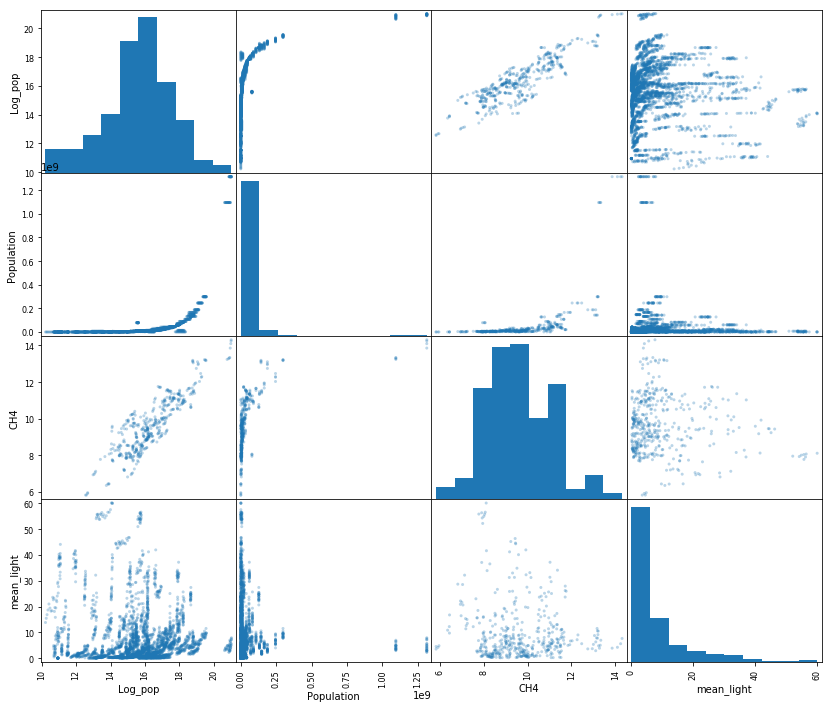

In [240]:
from pandas.plotting import scatter_matrix

scatter_matrix(fulldataset2[highmatrix],alpha=0.3,figsize=(14,12))



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020892351160>,
      dtype=object)

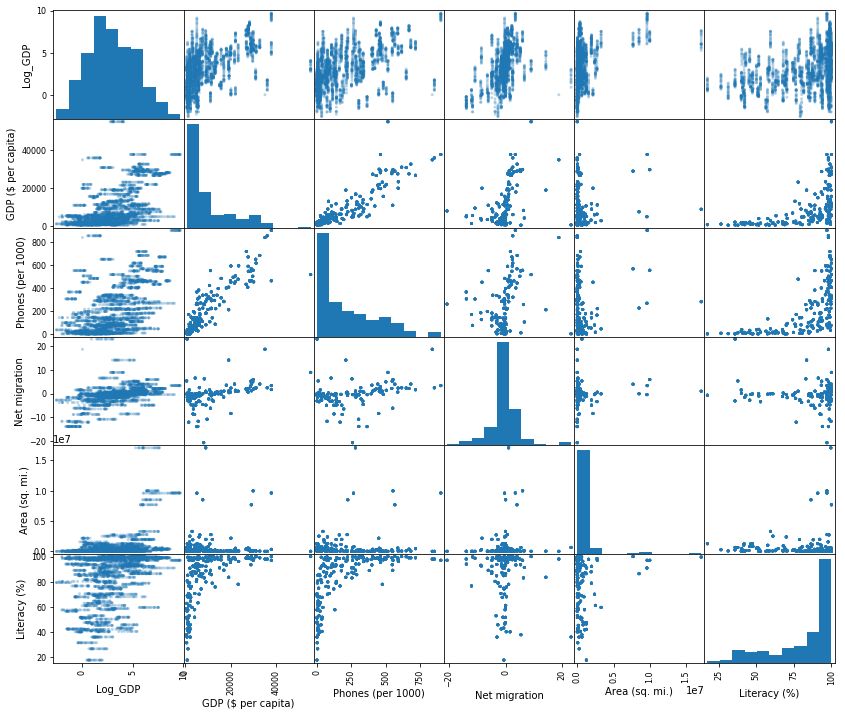

In [464]:
scatter_matrix(fulldataset2[midmatrix],alpha=0.3,figsize=(14,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002088ED34080>,
      dtype=object)

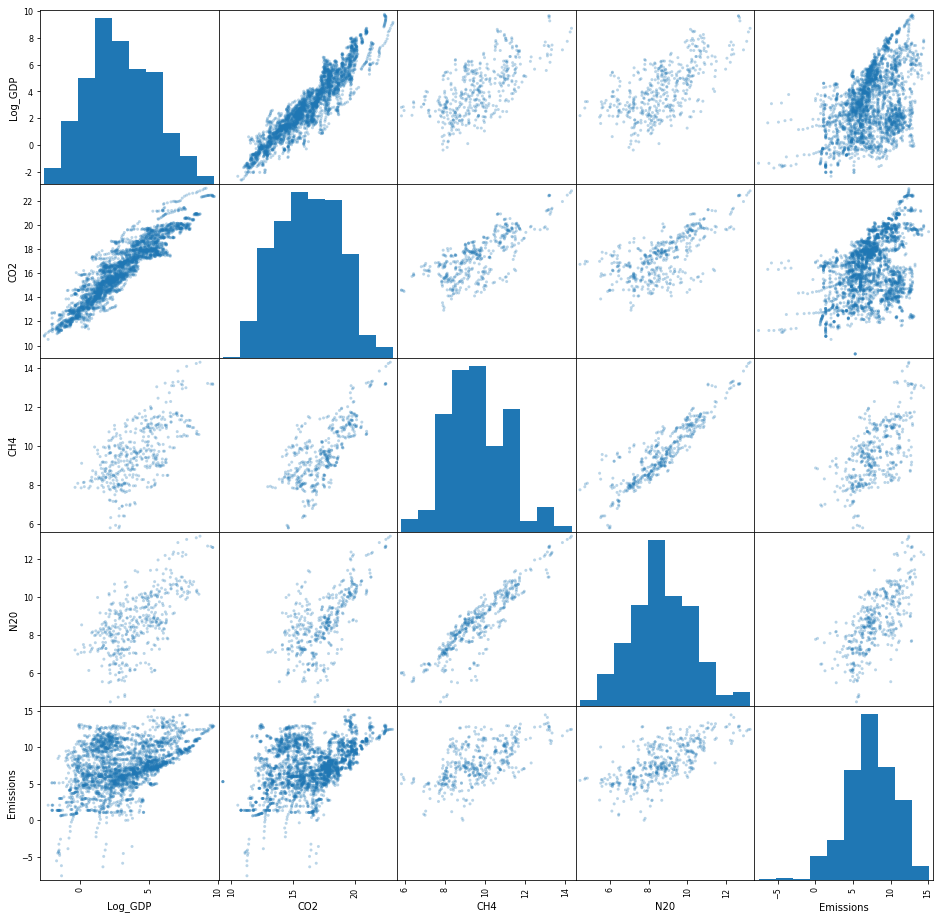

In [318]:
scatter_matrix(fulldataset2[matrixgases],alpha=0.3,figsize=(16,16))

In [423]:
fulldataset2.head(500)

,Region_x,Year,Area_lit,Elect_Cons,CO2,Log_GDP,Log_pop,N20,CH4,Emissions,Poverty,sum_light,mean_light,logarytmzsuml,Continent,Country,Region_y,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,merge_el_AL,gazy,Gazyy
Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AFG,Afghanistan,1992,4.707933,-0.263900,14.170709,NaN,16.436232,0.0,0.0,5.075174,NaN,18215,0.224392,9.810001,A,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,4.444032,5.075174,mid
AFG,Afghanistan,1993,3.857499,-0.315245,14.134055,NaN,16.511783,0.0,0.0,5.075174,NaN,13178,0.163279,9.486304,A,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,3.542254,5.075174,mid
AFG,Afghanistan,1994,4.398252,-0.287455,14.093233,NaN,16.579939,0.0,0.0,5.075174,NaN,17016,0.190863,9.741909,A,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,4.110796,5.075174,mid
AFG,Afghanistan,1995,4.377109,-0.377694,14.053568,NaN,16.635253,0.0,0.0,5.075174,NaN,19277,0.194245,9.866668,A,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,3.999415,5.075174,mid
AFG,Afghanistan,1996,4.184320,-0.477117,13.997089,NaN,16.676671,0.0,0.0,5.075174,NaN,19275,0.181689,9.866564,A,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,3.707203,5.075174,mid
AFG,Afghanistan,1997,4.009077,-0.572577,13.924157,NaN,16.707777,0.0,0.0,5.075174,NaN,14106,0.169546,9.554356,A,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,3.436500,5.075174,mid
AFG,Afghanistan,1998,4.401849,-0.639038,13.870090,NaN,16.733902,0.0,0.0,1.791759,NaN,17191,0.192557,9.752141,A,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,3.762812,1.791759,low
AFG,Afghanistan,1999,4.200382,-0.647887,13.632079,NaN,16.761970,0.0,0.0,4.827353,NaN,15199,0.159561,9.628985,A,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,3.552494,4.827353,mid
AFG,Afghanistan,2000,4.872728,-0.626779,13.568421,NaN,16.796228,0.0,0.0,4.840005,NaN,25345,0.229796,10.140337,A,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,4.245949,4.840005,mid


<h2> merging of below variables is optionally(to discuss)

In [85]:
fulldataset2["merge_el_AL"]=fulldataset2["Elect_Cons"]+fulldataset2["Area_lit"]

In [86]:
dwi=["merge_el_AL","Log_GDP"]

<Figure size 1440x1080 with 0 Axes>

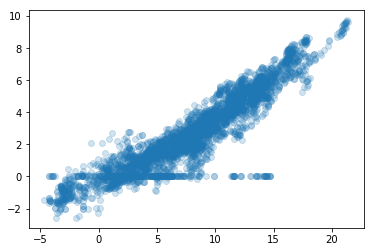

<Figure size 1440x1080 with 0 Axes>

In [87]:
plt.scatter(x=fulldataset2["merge_el_AL"],y=fulldataset2["Log_GDP"],alpha=0.2)
plt.figure(figsize=[20,15])



In [312]:
plt.show()

<H2> kombinowanie z gazami

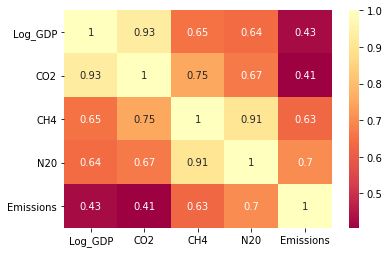

In [319]:
sns.heatmap(fulldataset2[matrixgases].corr(method='pearson'),annot=True,cmap='Spectral',center=True)

repalcing nans on zeros to merge all of the columns

In [54]:
fulldataset2["N20"].replace(np.NaN,0,inplace=True)
fulldataset2["Emissions"].replace(np.NaN,0,inplace=True)
fulldataset2["CH4"].replace(np.NaN,0,inplace=True)
fulldataset2["CO2"].replace(np.NaN,0,inplace=True)


In [52]:
braki=fulldataset2["Log_GDP"].value_counts()

In [53]:
braki


 0.000000    291
 3.727488      1
 4.280959      1
 1.857349      1
-0.223291      1
-0.420452      1
 3.212909      1
-0.740026      1
-0.162262      1
 4.033878      1
 0.468107      1
 3.815872      1
 0.823399      1
 3.457696      1
 5.936185      1
 6.092663      1
 5.209553      1
 3.609888      1
 0.297193      1
 6.298730      1
 2.880626      1
 1.589324      1
-0.146058      1
 0.902662      1
 2.639278      1
 1.984365      1
 5.201121      1
 1.385051      1
 1.472017      1
 1.156638      1
            ... 
 1.799163      1
 1.481856      1
 3.682208      1
 7.942928      1
 4.198192      1
 6.271218      1
 1.961681      1
 5.851260      1
 5.850632      1
 3.204405      1
 3.599820      1
 5.251755      1
-0.088550      1
 3.874900      1
 2.127977      1
 1.930279      1
 0.597547      1
 7.122471      1
 0.665430      1
 4.987163      1
-1.830085      1
 3.012599      1
 1.371814      1
 6.427065      1
 3.689422      1
 3.471185      1
 2.080737      1
 1.580157     

<h3> merging columns with gases,describing and looking for the differences in the groups divided according to value of gases

In [55]:
fulldataset2["gazy"]=fulldataset2["N20"]+fulldataset2["Emissions"]+fulldataset2["CH4"]

In [56]:
fulldataset2["gazy"].isnull().sum()/len(fulldataset2["gazy"])

0.0

In [390]:
fulldataset2["gazy"].describe()

count    3690.000000
mean        8.459011
std         7.884935
min        -7.565535
25%         3.688879
50%         7.089070
75%        10.480724
max        39.964016
Name: gazy, dtype: float64

In [64]:
def GazyG(gaziki):
    a=''
    if (gaziki==0):
        a='very_low'
    elif (gaziki<=3.688879):
        a='low'
    elif (gaziki<=7.089070):
        a='mid'
    else:
        a='very high'
    return a
fulldataset2['GazyG']=fulldataset2.gazy.map(GazyG)

In [65]:
poli=fulldataset2.groupby(by=fulldataset2['GazyG'])["Log_GDP"].mean()

<h3>siginificant differences

In [67]:
fulldataset2

,Region_x,Year,Area_lit,Elect_Cons,CO2,Log_GDP,Log_pop,N20,CH4,Emissions,Poverty,sum_light,mean_light,logarytmzsuml,Continent,Country,Region_y,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,gazy,GazyG
Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AFG,Afghanistan,1992,4.707933,-0.263900,14.170709,0.000000,16.436232,0.000000,0.000000,5.075174,0.0,18215,0.224392,9.810001,A,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,5.075174,mid
AFG,Afghanistan,1993,3.857499,-0.315245,14.134055,0.000000,16.511783,0.000000,0.000000,5.075174,0.0,13178,0.163279,9.486304,A,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,5.075174,mid
AFG,Afghanistan,1994,4.398252,-0.287455,14.093233,0.000000,16.579939,0.000000,0.000000,5.075174,0.0,17016,0.190863,9.741909,A,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,5.075174,mid
AFG,Afghanistan,1995,4.377109,-0.377694,14.053568,0.000000,16.635253,0.000000,0.000000,5.075174,0.0,19277,0.194245,9.866668,A,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,5.075174,mid
AFG,Afghanistan,1996,4.184320,-0.477117,13.997089,0.000000,16.676671,0.000000,0.000000,5.075174,0.0,19275,0.181689,9.866564,A,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,5.075174,mid
AFG,Afghanistan,1997,4.009077,-0.572577,13.924157,0.000000,16.707777,0.000000,0.000000,5.075174,0.0,14106,0.169546,9.554356,A,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,5.075174,mid
AFG,Afghanistan,1998,4.401849,-0.639038,13.870090,0.000000,16.733902,0.000000,0.000000,1.791759,0.0,17191,0.192557,9.752141,A,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,1.791759,low
AFG,Afghanistan,1999,4.200382,-0.647887,13.632079,0.000000,16.761970,0.000000,0.000000,4.827353,0.0,15199,0.159561,9.628985,A,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,4.827353,mid
AFG,Afghanistan,2000,4.872728,-0.626779,13.568421,0.000000,16.796228,0.000000,0.000000,4.840005,0.0,25345,0.229796,10.140337,A,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,4.840005,mid


In [465]:
poli.describe()

count    4.000000
mean     2.238891
std      1.206656
min      1.038197
25%      1.508128
50%      2.038149
75%      2.768912
max      3.841069
Name: Log_GDP, dtype: float64

In [451]:
#fulldataset2.drop(["Gazy],axis=1,inplace=True)

,Region_x,Year,Area_lit,Elect_Cons,CO2,Log_GDP,Log_pop,N20,CH4,Emissions,Poverty,sum_light,mean_light,logarytmzsuml,Continent,Country,Region_y,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,merge_el_AL,gazy,Gazyy
Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [403]:
pol

Gazyy
low          1.373729
mid          2.411526
very high    3.841069
Name: Log_GDP, dtype: float64

<H2> analyse numeric variable of "gazy" which could be also change on categorical variable " GazyG"

In [361]:
rrr=["gazy","Log_GDP"]

<Figure size 1440x1080 with 0 Axes>

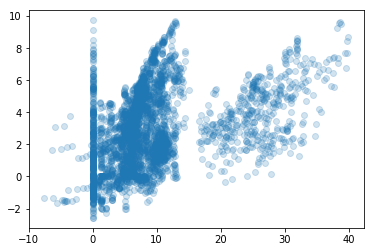

<Figure size 1440x1080 with 0 Axes>

In [68]:
plt.scatter(x=fulldataset2["gazy"],y=fulldataset2["Log_GDP"],alpha=0.2)
plt.figure(figsize=[20,15])

In [437]:
wrrr=fulldataset2["gazy"]==0

In [439]:
fulldataset2[wrrr]

,Region_x,Year,Area_lit,Elect_Cons,CO2,Log_GDP,Log_pop,N20,CH4,Emissions,Poverty,sum_light,mean_light,logarytmzsuml,Continent,Country,Region_y,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,merge_el_AL,gazy,Gazyy,Gazyyy
Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AFG,Afghanistan,2013,6.837424,1.518519,16.872742,3.011097,17.239203,0.0,0.0,0.0,NaN,124351,0.916672,11.730863,A,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,8.355943,0.0,low,low
AGO,Angola,2013,7.733642,1.950906,17.295641,4.821718,16.970304,0.0,0.0,0.0,NaN,234126,3.109186,12.363615,AF,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,NaN,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246,9.684549,0.0,low,low
ALB,Albania,2013,6.331464,1.515347,15.387199,2.559027,14.879066,0.0,0.0,0.0,NaN,105620,4.591816,11.567603,EE,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,7.846811,0.0,low,low
ANT,Netherlands Antilles,1992,4.947977,-0.368169,0.000000,NaN,NaN,0.0,0.0,0.0,NaN,12790,16.662752,9.456419,AO,Netherlands Antilles,LATIN AMER. & CARIB,221736,960,231.0,37.92,-0.41,10.03,11400.0,96.7,365.3,10.00,NaN,90.00,2.0,14.78,6.45,0.010,0.150,0.840,4.579807,0.0,low,low
ANT,Netherlands Antilles,1993,4.981907,-0.294371,0.000000,NaN,NaN,0.0,0.0,0.0,NaN,13632,18.764015,9.520175,AO,Netherlands Antilles,LATIN AMER. & CARIB,221736,960,231.0,37.92,-0.41,10.03,11400.0,96.7,365.3,10.00,NaN,90.00,2.0,14.78,6.45,0.010,0.150,0.840,4.687536,0.0,low,low
ANT,Netherlands Antilles,1994,5.060417,-0.223144,0.000000,NaN,NaN,0.0,0.0,0.0,NaN,14163,19.419716,9.558388,AO,Netherlands Antilles,LATIN AMER. & CARIB,221736,960,231.0,37.92,-0.41,10.03,11400.0,96.7,365.3,10.00,NaN,90.00,2.0,14.78,6.45,0.010,0.150,0.840,4.837274,0.0,low,low
ANT,Netherlands Antilles,1995,5.081751,-0.186330,0.000000,NaN,NaN,0.0,0.0,0.0,NaN,14835,19.316745,9.604745,AO,Netherlands Antilles,LATIN AMER. & CARIB,221736,960,231.0,37.92,-0.41,10.03,11400.0,96.7,365.3,10.00,NaN,90.00,2.0,14.78,6.45,0.010,0.150,0.840,4.895421,0.0,low,low
ANT,Netherlands Antilles,1996,5.072667,-0.140412,0.000000,NaN,NaN,0.0,0.0,0.0,NaN,14652,19.539863,9.592332,AO,Netherlands Antilles,LATIN AMER. & CARIB,221736,960,231.0,37.92,-0.41,10.03,11400.0,96.7,365.3,10.00,NaN,90.00,2.0,14.78,6.45,0.010,0.150,0.840,4.932255,0.0,low,low
ANT,Netherlands Antilles,1997,5.001714,-0.141564,0.000000,NaN,NaN,0.0,0.0,0.0,NaN,13480,18.622432,9.508962,AO,Netherlands Antilles,LATIN AMER. & CARIB,221736,960,231.0,37.92,-0.41,10.03,11400.0,96.7,365.3,10.00,NaN,90.00,2.0,14.78,6.45,0.010,0.150,0.840,4.860151,0.0,low,low


In [369]:
fulldataset2[rrr].corr()

,gazy,Log_GDP
gazy,1.000000,0.383397
Log_GDP,0.383397,1.000000


<h2> analyze categorical variable
    

In [178]:
grupyreg=fulldataset2.groupby(by=fulldataset2["Region_y"])
m=grupyreg["Log_GDP"].mean()

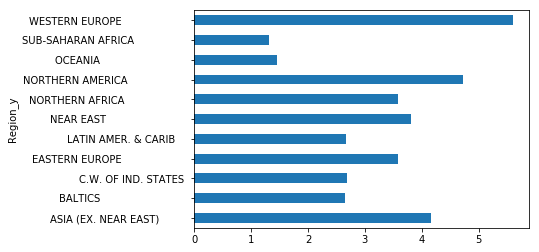

In [179]:
m.plot(kind="barh")

In [383]:
grupyregcont=fulldataset2.groupby(by=fulldataset2["Continent"])
c=grupyregcont["Log_GDP"].mean()

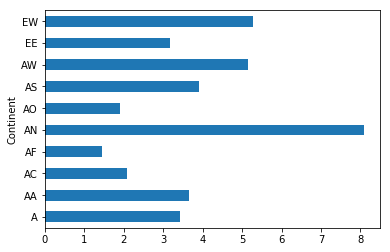

In [385]:
c.plot(kind="barh")

Log_GDP    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

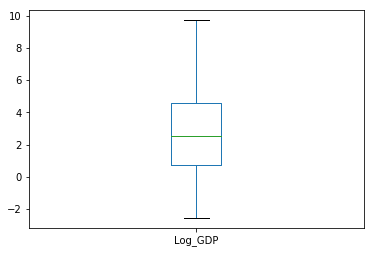

In [88]:
fulldataset2.plot(x="Region_y",y="Log_GDP",kind="box",subplots=True)